In [13]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("AAPL", start = start_date, end = end_date, progress = False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-04,3.372500,3.400357,3.180714,3.264643,2.787457,1091370000
2008-12-05,3.226786,3.374643,3.173571,3.357143,2.866436,1043795200
2008-12-08,3.474286,3.600000,3.421429,3.561429,3.040861,1185142000
2008-12-09,3.501429,3.700000,3.471786,3.573571,3.051229,1203496000
2008-12-10,3.495357,3.553214,3.446429,3.507500,2.994816,938047600
...,...,...,...,...,...,...
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500


In [14]:
data["Date"] = data.index
data = data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop = True, inplace = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3441,2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900
3442,2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500
3443,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
3444,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
3445,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400


### Candlestick bar

In [15]:
import plotly.graph_objects as go

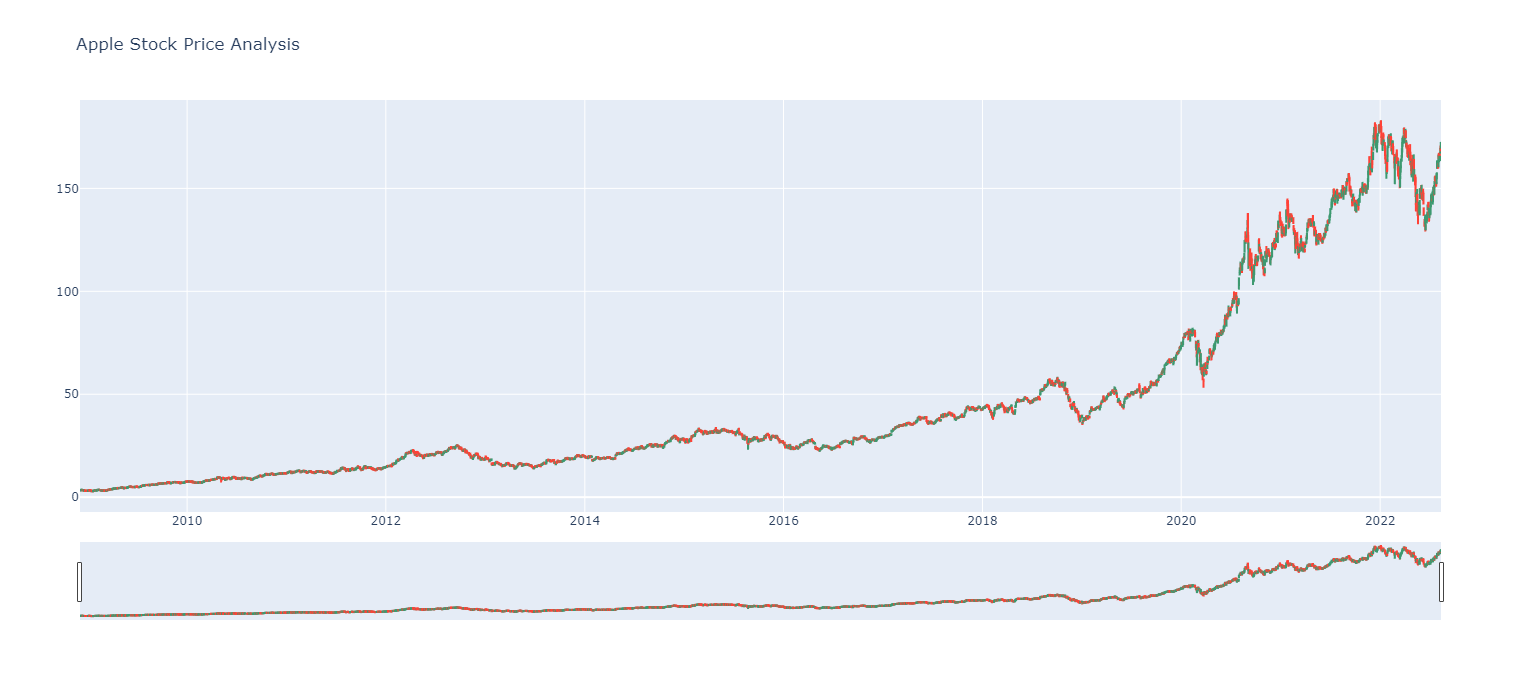

In [21]:
figure = go.Figure(data = [go.Candlestick(x = data["Date"],
                                          open = data["Open"],
                                          high = data["High"],
                                          low = data["Low"],
                                          close = data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis",
                     xaxis_rangeslider_visible = True,
                     height = 700)
figure.show()

In [23]:
correlation = data.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999907,0.999878,0.999752,0.999649,-0.516226
High,0.999907,1.000000,0.999856,0.999878,0.999789,-0.514785
Low,0.999878,0.999856,1.000000,0.999883,0.999775,-0.518311
Close,0.999752,0.999878,0.999883,1.000000,0.999902,-0.516598
Adj Close,0.999649,0.999789,0.999775,0.999902,1.000000,-0.513484
Volume,-0.516226,-0.514785,-0.518311,-0.516598,-0.513484,1.000000


In [24]:
correlation["Close"].sort_values(ascending = False)

Close        1.000000
Adj Close    0.999902
Low          0.999883
High         0.999878
Open         0.999752
Volume      -0.516598
Name: Close, dtype: float64

### Training LSTM for Stock Price Prediction

In [25]:
x = data[["Open","High","Low","Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, batch_size = 1, epochs = 30)

Epoch 1/30
2756/2756 [==============================] - 7s 2ms/step - loss: 204.8967
Epoch 2/30
2756/2756 [==============================] - 4s 2ms/step - loss: 10.7652
Epoch 3/30
2756/2756 [==============================] - 4s 2ms/step - loss: 12.3971
Epoch 4/30
2756/2756 [==============================] - 5s 2ms/step - loss: 12.2002
Epoch 5/30
2756/2756 [==============================] - 4s 2ms/step - loss: 9.6433
Epoch 6/30
2756/2756 [==============================] - 4s 2ms/step - loss: 7.3023
Epoch 7/30
2756/2756 [==============================] - 4s 2ms/step - loss: 7.4924
Epoch 8/30
2756/2756 [==============================] - 5s 2ms/step - loss: 7.9385
Epoch 9/30
2756/2756 [==============================] - 4s 2ms/step - loss: 6.5414
Epoch 10/30
2756/2756 [==============================] - 4s 2ms/step - loss: 6.2663
Epoch 11/30
2756/2756 [==============================] - 4s 2ms/step - loss: 7.0823
Epoch 12/30
2756/2756 [==============================] - 4s 2ms/step - loss: 7.7

#### Prediction

In [45]:
import numpy as np
# features = [Open, High, Low, Volume]
features = np.array([[166.36999, 167.80999, 164.19999, 60276900]])
model.predict(features)

1/1 [==============================] - 1s 504ms/step


array([[166.51642]], dtype=float32)